In [45]:
import sympy as sym 
from sympy.abc import s,t,tau,x,y,z, a,b,c,m, R, L, C, w, g, k, I
from sympy.integrals import laplace_transform, inverse_laplace_transform
from sympy import Function, diff, laplace_initial_conds, solve
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget



<div style="text-align: center;">
COMMON TRANSFER FUNCTIONS</div> 
<div></div>

<div style="text-align: center;">
Simple Damped harm. osc.:</div>

$$mx'' = - kx - \gamma x'$$

$$\frac{1}{ms^2+\gamma s+k}$$

<div style="text-align: center;">
RC High Pass:</div>

$$\frac{sRC}{sRC+1}$$

<div style="text-align: center;">
RC Low Pass:</div>

$$\frac{1}{sRC+1}$$


<div style="text-align: center;">
RLC Series:</div>

$$V_C: \frac{1}{s^2LC+sRC+1}$$
$$V_L: \frac{s^2}{s^2+sR/L+1/LC}$$  
$$V_R: \frac{s}{s^2L/R+s+1/RC}$$



<div style="text-align: center;">
LC Tank:</div>

$$V_R: \frac{s}{s^2RC+s+R/L}$$



In [53]:
F = 1/((m*s**2+g*s+k)*(s+I*sym.sqrt(k/m)))
f = inverse_laplace_transform(F, s, t)
f

((-I*exp(-t*((sin(atan2(0, re(k)**2 + im(k)**2)/4)*sin(atan2(0, re(m)**2 + im(m)**2)/4)*re((re(k)**2 + im(k)**2)**(1/4)/(re(m)**2 + im(m)**2)**(1/4)) - sin(atan2(0, re(k)**2 + im(k)**2)/4)*cos(atan2(0, re(m)**2 + im(m)**2)/4)*im((re(k)**2 + im(k)**2)**(1/4)/(re(m)**2 + im(m)**2)**(1/4)) + sin(atan2(0, re(m)**2 + im(m)**2)/4)*cos(atan2(0, re(k)**2 + im(k)**2)/4)*im((re(k)**2 + im(k)**2)**(1/4)/(re(m)**2 + im(m)**2)**(1/4)) + cos(atan2(0, re(k)**2 + im(k)**2)/4)*cos(atan2(0, re(m)**2 + im(m)**2)/4)*re((re(k)**2 + im(k)**2)**(1/4)/(re(m)**2 + im(m)**2)**(1/4)))*sin(atan2(im(k), re(k))/2)*sin(atan2(im(m), re(m))/2)*re(I) - (sin(atan2(0, re(k)**2 + im(k)**2)/4)*sin(atan2(0, re(m)**2 + im(m)**2)/4)*re((re(k)**2 + im(k)**2)**(1/4)/(re(m)**2 + im(m)**2)**(1/4)) - sin(atan2(0, re(k)**2 + im(k)**2)/4)*cos(atan2(0, re(m)**2 + im(m)**2)/4)*im((re(k)**2 + im(k)**2)**(1/4)/(re(m)**2 + im(m)**2)**(1/4)) + sin(atan2(0, re(m)**2 + im(m)**2)/4)*cos(atan2(0, re(k)**2 + im(k)**2)/4)*im((re(k)**2 + im(k)**

In [32]:
# plug and play #
def transfer(s, R, L, C):
    """Transfer function for a simple RC circuit."""
    result = 1/(R*s**2+L*s+C) # <--- Put your transfer function here !!! 
    return np.where(np.isfinite(result), result, 1000)


In [33]:
def create_complex_plane(real_range=(-5, 5), imag_range=(-5, 5), points=(100, 100)):
    """Create a 2D array representing the complex plane."""
    real_vals = np.linspace(real_range[0], real_range[1], points[0])
    imag_vals = np.linspace(imag_range[0], imag_range[1], points[1])
    Real, Imag = np.meshgrid(real_vals, imag_vals)
    return Real + 1j * Imag

def mag2dB(array):
    """Convert magnitude to decibels."""
    # Ensure no negative or zero values to avoid log10 issues
    array_safe = np.where(array <= 0, 1e-12, array)
    return 20 * np.log10(array_safe)

# Example usage
S_plane = create_complex_plane((-100, 100), (-100, 100), (1001, 1001))

In [34]:
def gen_cross_section(Real, Imag, mag, Real_val):
    # Extract cross-section along imaginary axis (Real = 0)
    # Find the index closest to Real = 0
    real_n_idx = np.argmin(np.abs(Real[0, :]-Real_val))

    # Extract the slice along imaginary axis
    imag_axis = Imag[:, real_n_idx]
    mag_cross_section = mag[:, real_n_idx]
    real_zeros = np.ones_like(imag_axis) * Real_val  # Real = 0 for all points
    print(f"computed Imaginary axis cross-section for Real value: {Real_val}")
    return real_zeros, imag_axis, mag_cross_section

In [35]:
laplace_t_eval = transfer(S_plane, .1,0,640)
mag = np.abs(laplace_t_eval)
mag_dB = mag2dB(mag)
phase = np.angle(laplace_t_eval, deg=True)

/tmp/ipykernel_652824/2204200427.py:4: RuntimeWarning: divide by zero encountered in divide
  result = 1/(R*s**2+L*s+C) # <--- Put your transfer function here !!!
/tmp/ipykernel_652824/2204200427.py:4: RuntimeWarning: invalid value encountered in divide
  result = 1/(R*s**2+L*s+C) # <--- Put your transfer function here !!!


computed Imaginary axis cross-section for Real value: 0
(1001,)


Text(0.5, 0, '|H(s)|')

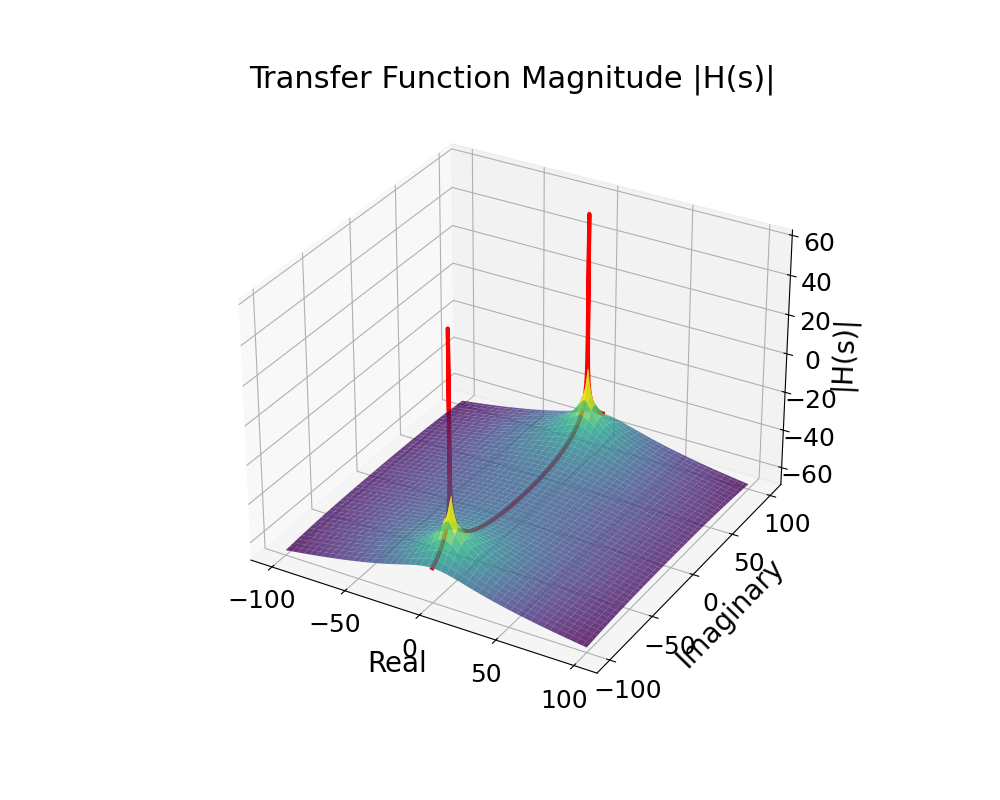

In [36]:
plt.close('all')  # Close any existing plots


# Create 3D magnitude plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


Real = S_plane.real
Imag = S_plane.imag

surf = ax.plot_surface(Real, Imag, mag_dB, cmap='viridis', alpha=0.8)


# Plot the cross-section as a red line

real_zeros, imag_axis, mag_cross_section = gen_cross_section(Real, Imag, mag_dB, 0)
print(imag_axis.shape)
ax.plot(real_zeros, imag_axis, mag_cross_section, 'r-', linewidth=3, label='Imaginary Axis Cross-section')



ax.set_title('Transfer Function Magnitude |H(s)|')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary') 
ax.set_zlabel('|H(s)|')
# ax.set_zlim(-10,10)  # This sets the z-axis to log scale
# ax.set_zscale('log')  # This sets the z-axis to log scale

# plt.colorbar(surf, shrink=0.5)



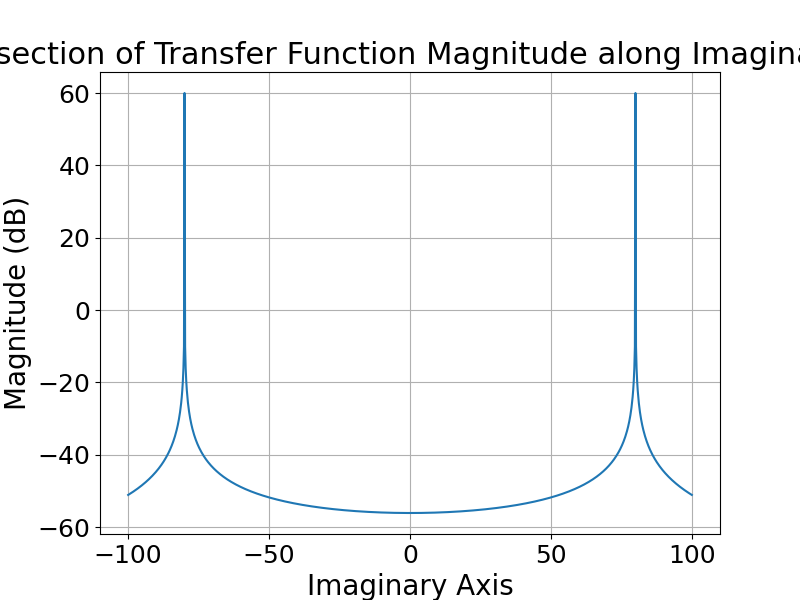

In [40]:
plt.close('all')
plt.plot(imag_axis, mag_cross_section)
plt.title('Cross-section of Transfer Function Magnitude along Imaginary Axis')
plt.xlabel('Imaginary Axis')
plt.ylabel('Magnitude (dB)')
# plt.xscale('log')
plt.grid()


computed Imaginary axis cross-section for Real value: 0
(1001,)


(-180.0, 180.0)

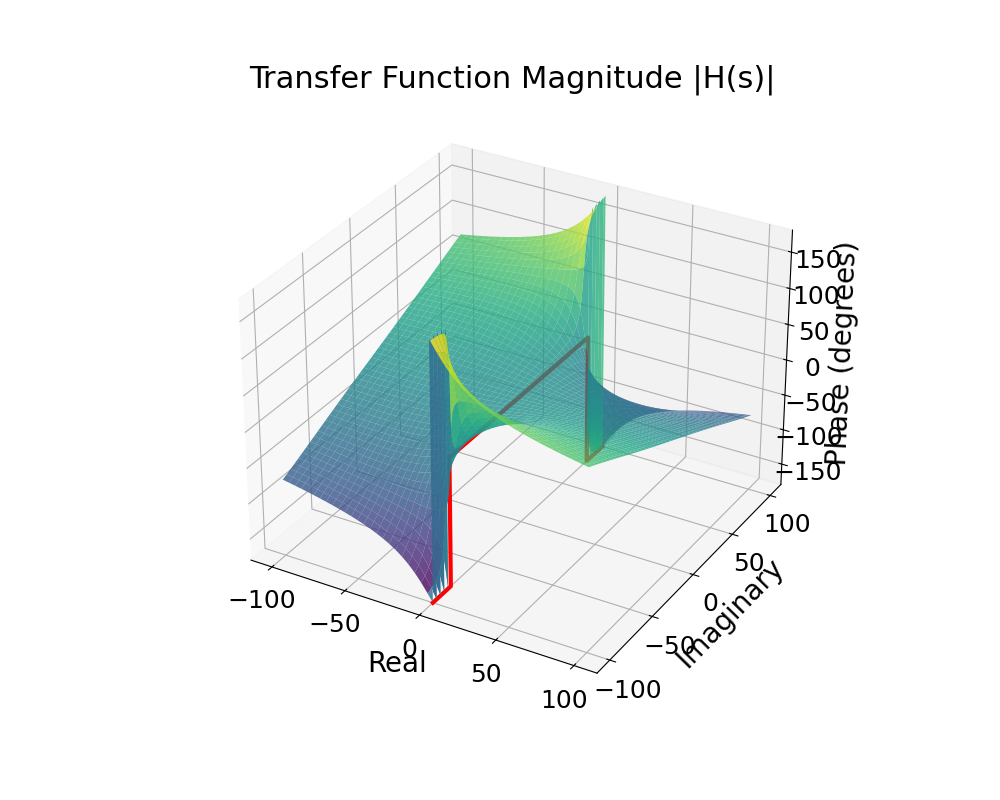

In [38]:
plt.close('all')  # Close any existing plots


# Create 3D magnitude plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


Real = S_plane.real
Imag = S_plane.imag

surf = ax.plot_surface(Real, Imag, phase, cmap='viridis', alpha=0.8)


# Plot the cross-section as a red line

real_zeros, imag_axis, phase_xc = gen_cross_section(Real, Imag, phase, 0)
print(imag_axis.shape)
ax.plot(real_zeros, imag_axis, phase_xc, 'r-', linewidth=3, label='Imaginary Axis Cross-section')



ax.set_title('Transfer Function Magnitude |H(s)|')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary') 
ax.set_zlabel('Phase (degrees)')
ax.set_zlim(-180, 180)  # This sets the z-axis limits

computed Imaginary axis cross-section for Real value: 0


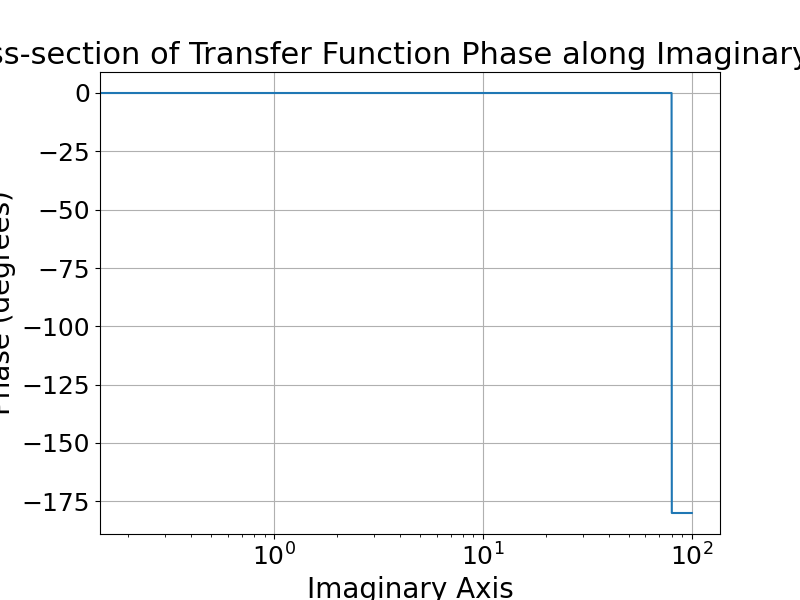

In [39]:
plt.close('all')  # Close any existing plots
_, _, phase_xc = gen_cross_section(Real, Imag, phase, 0)
plt.close('all')
plt.plot(imag_axis, phase_xc)
plt.title('Cross-section of Transfer Function Phase along Imaginary Axis')
plt.xlabel('Imaginary Axis')
plt.ylabel('Phase (degrees)')
plt.xscale('log')
plt.grid()


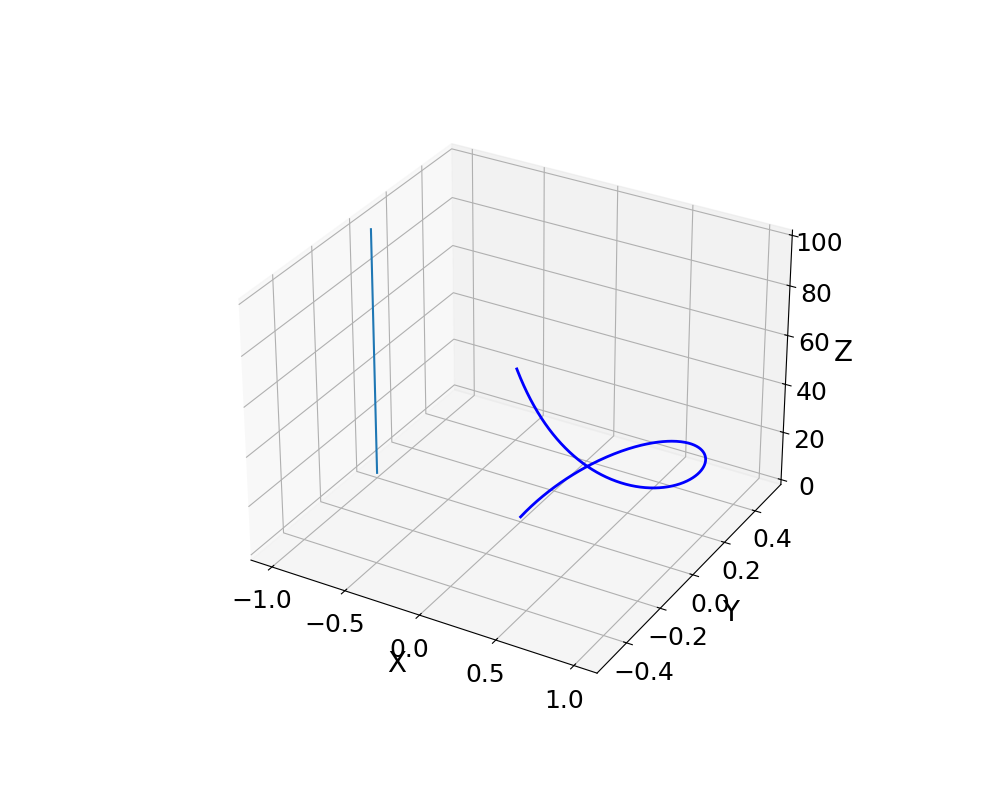

In [30]:
freq_sweep = np.linspace(0, 100, 1000) * 1j
laplace_freq_sweep = transfer(freq_sweep, 10,1,.001)



x = laplace_freq_sweep.real
y = laplace_freq_sweep.imag
z = freq_sweep.imag
# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'b-', linewidth=2)
ax.plot(-1, 0, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()